# LABORATORIO 4: Metodi predittivi

a.a. 2024/2025, 03/04/2025


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn

# Parte 1. Regressione Lineare

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

Importiamo il dataset:

In [23]:
titles = pd.read_csv('integrate_titles_3.csv')

visualizziamo il dataset

In [24]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

Supponiamo di voler stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. Prima di tutto, possiamo utilizzare una rappresentazione grafica per verificare se le due features siano correlate, e se sia quindi possibile utilizzare una di queste features per predire l'altra.


Text(0, 0.5, 'imdb_score')

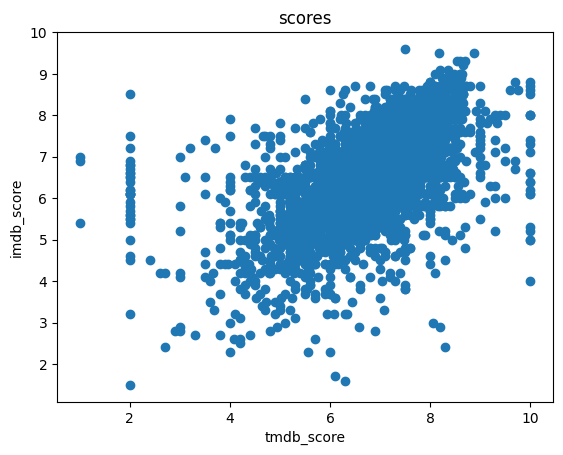

In [25]:
plt.scatter(titles['tmdb_score'],titles['imdb_score'])
plt.title('scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')

verifichiamo la correlazione utilizzando il coefficiente di correlazione di Pearson (r).

Vi ricordo che r ha valori nell'intervallo [-1,1].  

Inoltre:

r in [0,0.3] debole correlazione;

r in [0.3,0.7] moderata correlazione;

r in [0.7,1] forte correlazione;

i valori negativi del coefficiente di correlazione indicano una correlazione inversa, cioè all'aumentare di una caratteristica diminuisce l'altra e viceversa.


In [26]:
r = titles[['tmdb_score','imdb_score']].corr()
print(r)

            tmdb_score  imdb_score
tmdb_score    1.000000    0.591233
imdb_score    0.591233    1.000000


plottiamo in falsi colori

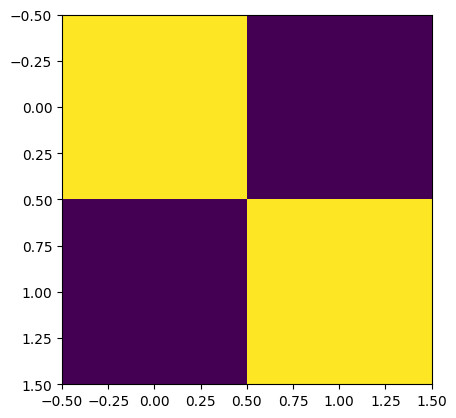

In [27]:
plt.imshow(r)

Ora ci chiediamo, quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda l'imdb_score a partire dallo score tmdb.

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua).

Possiamo quindi utilizzare un modello di Regressione lineare.

Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

* Training Set -> porzione di dati che utilizziamo per il training del nostro modello di regressione lineare;

* Validation Set -> porzione di dati che utilizziamo per valutare il nostro modello precedentemente allenato.

Non esiste un unico modo per dividere il dataset in training e validation, normalmente, si utilizza un random split con una certa percentuale (per esempio 70/30 per training/test).


Usiamo la libreria scikit-learn, lo schema che dovrete usare e' il seguente:

1. Definire le caratteristiche da usare;
2. Definire X e y;
3. Dividere il dataset in training e validation;
4. Istanziare un oggetto della classe LinearRegression;
5. Allenare usando la funzione fit invocata sull'oggetto istanziato (passando il training set!);
6. Visualizzare i coefficienti imparati: useremo gli attributi *intercept_=* e *coef_* sull'oggetto ottenuto come output della funzione fit.

In scikit-learn esiste la funzione:

    X_train, X_valid, y_train, y_valid = train_test_split(X, y)

che effettua per noi lo splitting.

In [28]:
from sklearn.model_selection import train_test_split
#codice qui

titles.dropna(subset=['tmdb_score','imdb_score'],inplace=True)
features = ['tmdb_score']
X = titles[features]
y = titles['imdb_score']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2)



In [29]:
X.shape

(4068, 1)

adesso implementiamo la regressione

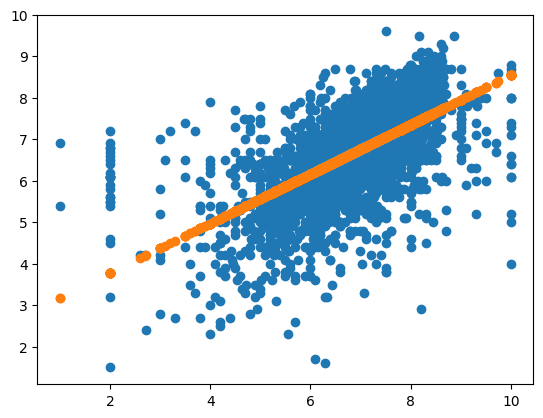

In [30]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
reg = regressor.fit(X_train,y_train)
y_pred_train = reg.coef_*X_train + reg.intercept_
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train)
#codice qui

Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento x_valid

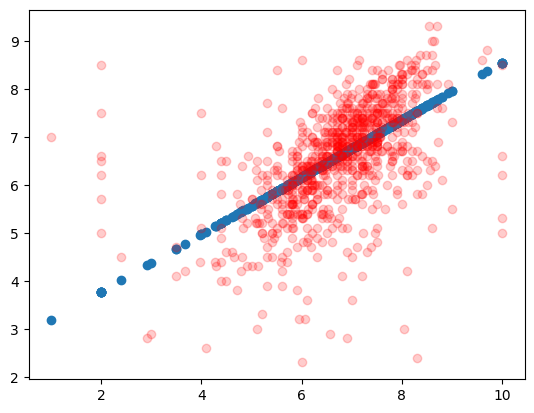

In [31]:
#codice qui
y_pred = reg.predict(X_valid)
plt.scatter(X_valid,y_pred)
plt.scatter(X_valid,y_valid,c='r',alpha=0.2)

Ora, come possiamo stimare la precisione della funzione che abbiamo imparato?

Sappiamo che non esiste una soluzione perfetta, ma possiamo trovare la soluzione migliore possibile, con i dati a disposizione. Per trovarla, useremo stime degli errori.

Abbiamo visto che ci sono tre metriche per valutare i modelli a regressione di machine learning:

lo scarto medio assoluto (MAE - Mean Absolute Error);
l’errore quadratico medio (MSE - Mean Squared Error);
la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).
ESERCIZIO: scrivete una funzione che implementi ciascuna delle tre metriche sopra descritte.

In [32]:
def MAE(y_pred,y_true):

     return 1/y_pred.shape[0]*np.abs((y_pred-y_true)).sum()

def MSE(y_pred,y_true):

     return 1/y_pred.shape[0]*((y_pred-y_true)**2).sum()

def RMSE(y_pred,y_true):

     return np.sqrt(1/y_pred.shape[0]*((y_pred-y_true)**2).sum())



usate le tre funzioni appena definite, per calcolare le tre metriche sul modello di regressione lineare appena ottenuto (sul validation set)

In [33]:
#MAE
print(MAE(y_pred,y_valid))


#MSE
print(MSE(y_pred,y_valid))


#RMSE
print(RMSE(y_pred,y_valid))


0.694970569831345
0.9286847429198533
0.9636829057941483


possiamo anche utilizzare le funzioni messe a disposizione da scikit-learn.

In [34]:
import sklearn.metrics as metrics
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

MAE: 0.694970569831345
MSE: 0.9286847429198533
RMSE: 0.9636829057941483


Come faccio a sapere se questo risultato e' un buon risultato oppure no?

Determiniamo il modello nullo.

il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello.

Nella regressione, possiamo sostituire tutti i valori della feature imdb_score con la media sull'intero dataset.

In [35]:
#calcolate lo score medio
mean_imdb_score = y_train.mean()

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y = np.ones(len(y_valid))*mean_imdb_score
print(MSE(null_model_y,y_valid))

#stampate gli errori

1.2750375474099818


ESERCIZIO.

* Adesso, utilizzate come test set la tabella amazon_titles.

1. Pulite e preparate il dataset;

2. Applicate il modello di regressione imparato;

3. Sfruttate errori a dispozione e modello nullo per determinare se riusciamo a generalizzare bene verso questo set di dati.

In [36]:
#leggiamo e visualizziamo


In [37]:
#verifichiamo elementi nulli ed eliminamo


In [38]:
#applichiamo il modello imparato

#visualizziamo

calcoliamo gli errori corrispondenti

In [39]:
#codice qui, usate le funzioni scikit-learn

In [40]:
#calcolate lo score medio

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato


#calcoliamo errori

cosa pensate del modello imparato? traete le opportune conclusioni

# Parte 2. Regressione Logistica

Adesso, proviamo a risolvere un problema di classificazione, utilizzando la regressione logistica, come visto a lezione.


Riuscite a trasformare il nostro problema di stimare imdb_score a partire dal tmdb_score, da regressione a classificazione?

**tip** create una nuova colonna e provate a creare la caratteristica *above_average* che sia:

- 1 Se imdb_score > mean(imdb_score);
- 0 altrimenti.

Usiamo il dataset integrate_titles come fatto in precedenza.

In [41]:
#creiamo la colonna integrate_titles['above_average']
mean_value = titles['imdb_score'].mean()
print(mean_value)
titles['above_average']= (titles['imdb_score']>mean_value).astype(int)

6.598869223205506


In [42]:
y = titles['above_average']
X = titles[['tmdb_score']]
print(np.sum(y==0))


X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2)


1834


In [43]:
classe0 = np.sum(y_valid==0)/X_valid.shape[0]
classe1 = np.sum(y_valid==1)/X_valid.shape[0]
print(classe0)
print(classe1)

0.40540540540540543
0.5945945945945946


Passi da eseguire (molto simile a quanto gia' fatto):

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale.

In [ ]:
reg = ()
reg.fit(X_train,y_train)

#codice qui

NameError: name 'LogisticRegression' is not defined

In [ ]:
y_pred = reg.predict(X_valid)
print(reg.score(X_valid,y_valid))

0.7911547911547911


Benissimo, siamo riusciti a raggiungere un'accuratezza del 80% con un modello di logistic regression.

quale sarebbe un opportuno modello nullo per confrontare?

possiamo immaginare di predire sempre la classe più comune. Verificate quale sia, e deducete score per il modello nullo.

In [ ]:
#codice qui per modello nullo

traete le vostre conclusioni.

Compito per casa.

Provate ad utilizzare il dataset di amazon come test, e ripetete tutto quanto visto per la tabella integrata di netflix e disney plus.

In [ ]:
#applichiamo il modello imparato